In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:
#loading dataset
df = pd.read_csv('car_data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
#taking out summary of dataset
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [4]:
#checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
# Drop irrelevant columns (e.g., Car_Name)
df = df.drop('Car_Name', axis=1)

In [6]:
#converting year to age
current_year = 2024
df['Age'] = current_year - df['Year']
df = df.drop('Year', axis=1)

In [7]:
# Encode categorical variables (Label Encoding)
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])  # Petrol: 2, Diesel: 1, CNG: 0
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])  # Dealer: 1, Individual: 0
df['Transmission'] = le.fit_transform(df['Transmission'])  # Manual: 1, Automatic: 0

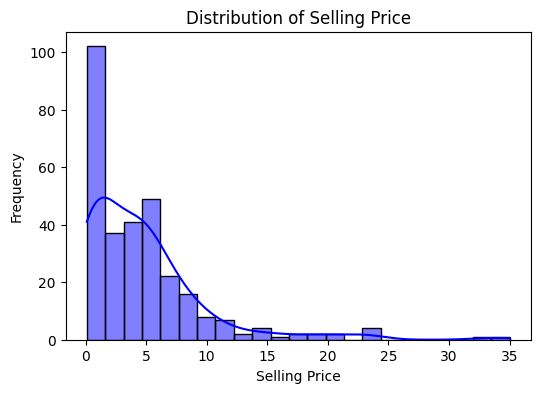

In [9]:
#performing EDA
#1 distribution of selling price
plt.figure(figsize=(6, 4))
sns.histplot(df['Selling_Price'], kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

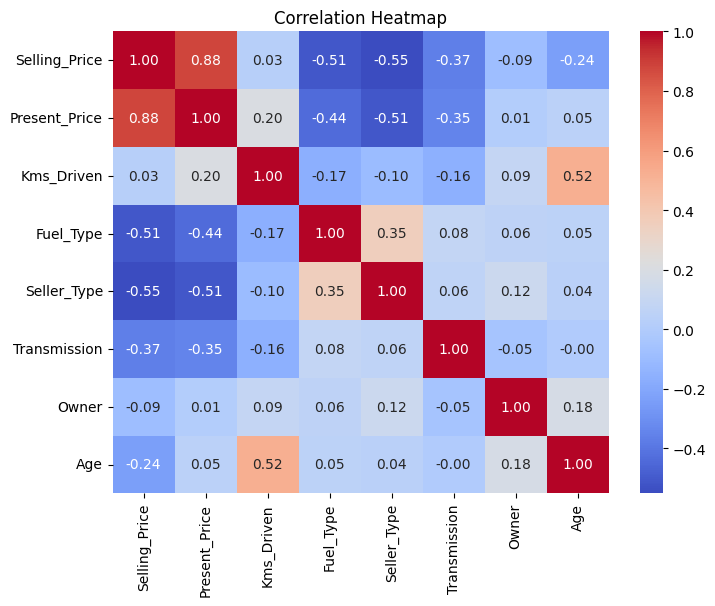

In [11]:
#2 Creating correlation heatmap
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

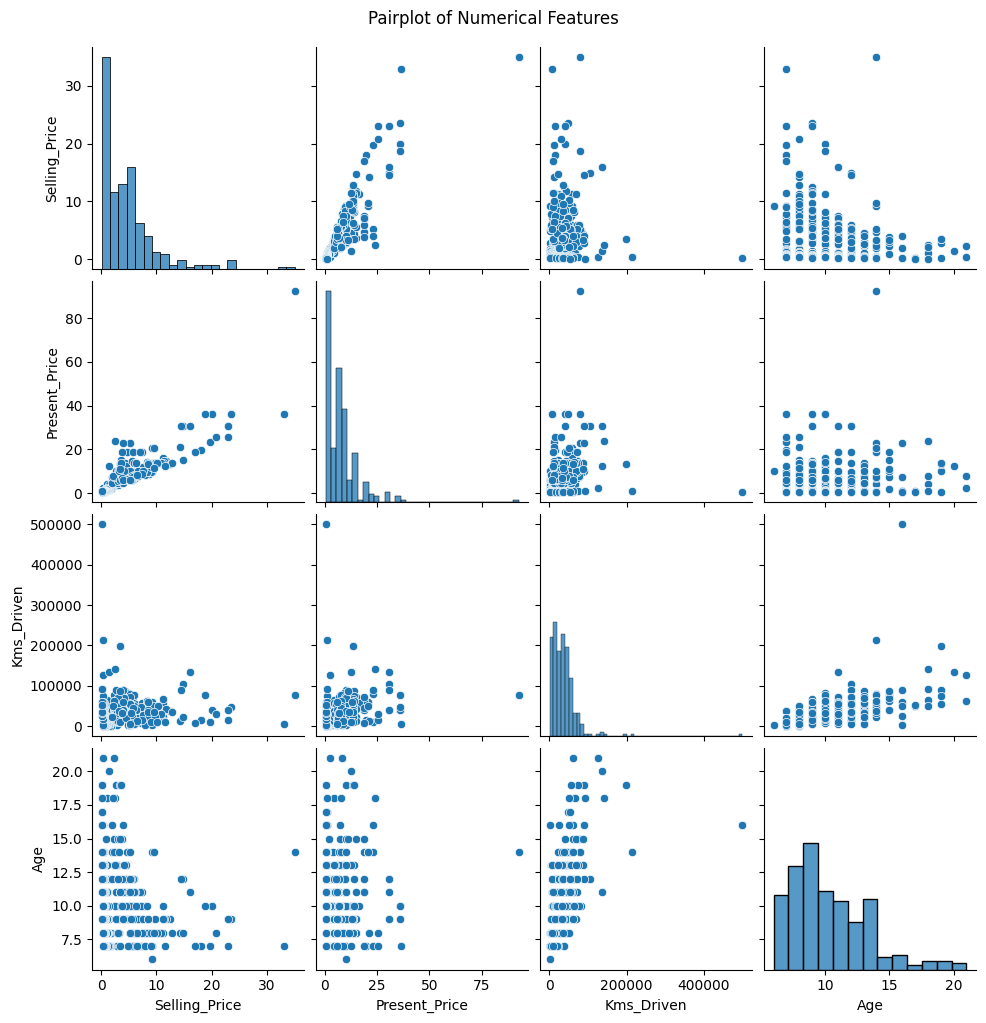

In [12]:
#creating pairplot for numerical values
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

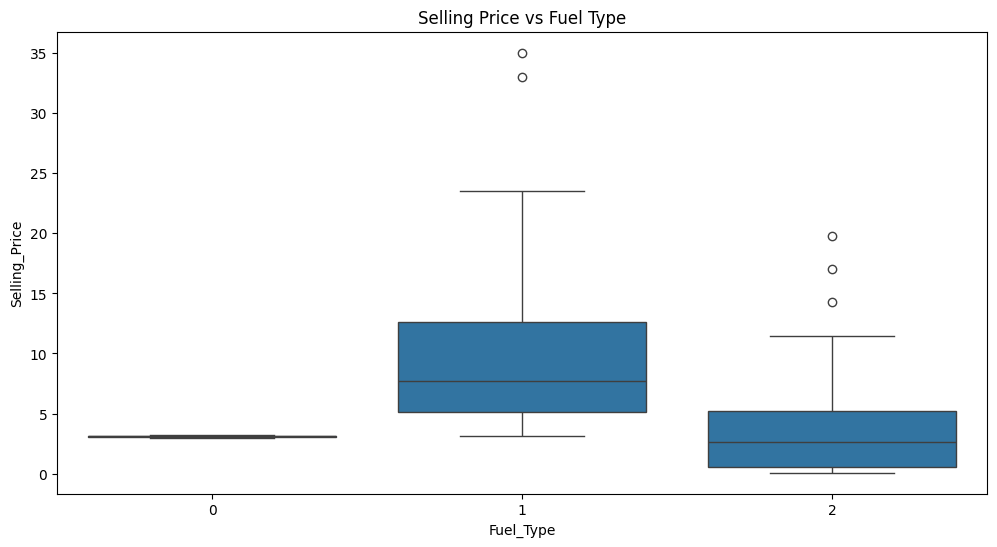

In [13]:
# 4. Boxplot for Categorical Features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Fuel Type')
plt.show()

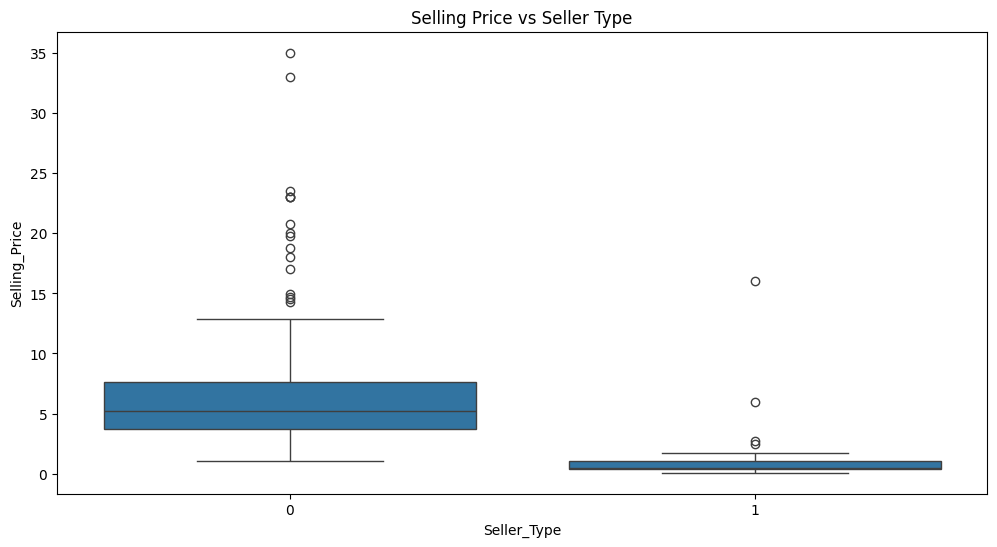

In [14]:
#for selling price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Seller Type')
plt.show()

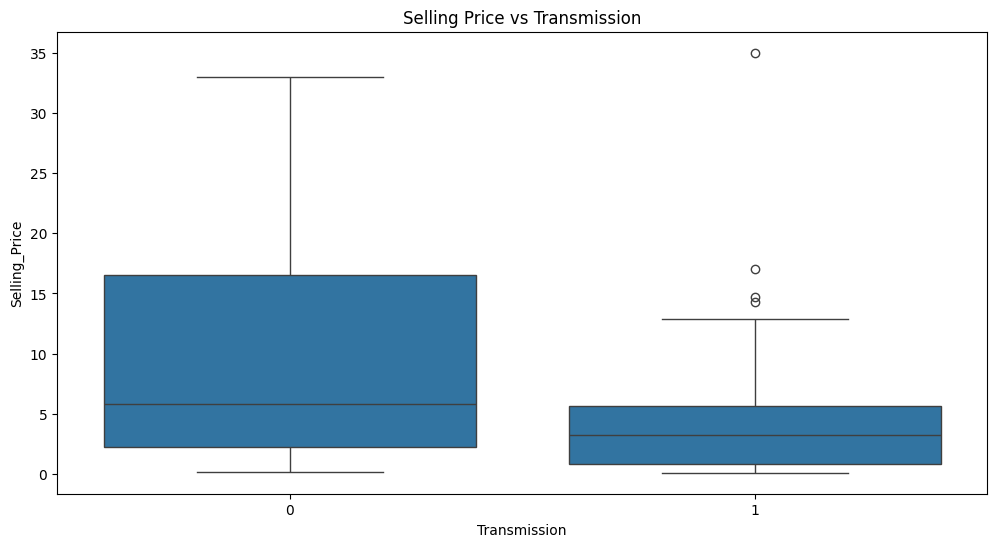

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price vs Transmission')
plt.show()

In [16]:
#functions for ANOVA
def perform_anova(data, categorical_feature, target_feature):
    categories = data[categorical_feature].unique()
    groups = [data[data[categorical_feature] == category][target_feature] for category in categories]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {categorical_feature}:")
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

In [17]:
# Perform ANOVA for each categorical feature
perform_anova(df, 'Fuel_Type', 'Selling_Price')
perform_anova(df, 'Seller_Type', 'Selling_Price')
perform_anova(df, 'Transmission', 'Selling_Price')

ANOVA for Fuel_Type:
F-statistic: 65.41, p-value: 0.0000
ANOVA for Seller_Type:
F-statistic: 130.16, p-value: 0.0000
ANOVA for Transmission:
F-statistic: 46.58, p-value: 0.0000


In [18]:
#splitting
# Split data into features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.6385442622950821
R2 Score: 0.959315188851573
